Q1 - How many unique locations and continents. 
Q2 - Average new cases across all rows (mean, median, std) using NumPy.
Q3 - Top 5 locations by maximum total cases observed.
Q4 - Mean positive rate per continent.
Q5 - Create a simple case fatality rate (CFR) per location on the latest date for each location.
Q6 - Vaccinations per 100 people (using total_vaccinations / population * 100) for latest date per location.
Q7 - New case 90th percentile (NumPy).
Q8 - Correlation between total_cases and total_deaths.
Q9 - Create a flag column 'high_positive_rate' if positive_rate > 0.10.
Q10 - For each continent, total new cases (sum).
Q11 - Rolling 7-day average of new_cases for one example location (first alphabetically).
Q12 - Average positive_rate by continent and month by (Pivot table).
Q13 - Daily global new cases on Top 10 (sum across locations per date).
Q14 - Top 5 locations by tests_per_case.
Q15 - Total population by continent.
Q16 - rows where new_deaths > new_cases on Top 10 (data quality check) (filter).
Q17 - Group On data of rows where new_deaths > new_cases on Top 10.
Q18 - New cases trend (time series).
Q19 - Top 10 countries by total cases.
Q20 - Total cases vs Total deaths.
Q21 - Distribution of positive_rate.
Q22 - Continent-wise total vaccinations.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("synthetic_covid19_data.csv")

In [3]:
df

,date,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_tests,new_tests,positive_rate,...,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence
0,2021-11-19,Asia,India,6423388,2490,107051,323,60016385,7386,0.904377,...,69.259331,1241418161,67.394702,49.883751,8.649395,16.052063,44313.199955,20.827286,177.832655,16.296474
1,2021-09-12,North America,Russia,6550634,6980,481184,697,28666409,6862,0.525850,...,7.185287,114516392,694.409929,30.126823,8.957854,4.423022,8196.945011,20.478579,470.991420,8.579170
2,2020-04-20,Europe,Canada,4304572,9134,15116,325,80352550,40108,0.791575,...,14.823246,1152898402,784.464729,22.648063,9.336778,18.776372,52607.000057,11.924664,415.880908,14.989789
3,2022-10-16,Asia,Germany,2234489,7661,20045,624,89212990,91788,0.115291,...,70.007502,1342525124,403.467508,42.951109,5.321894,10.526520,23297.985037,4.591400,643.510444,18.084096
4,2021-05-15,Europe,USA,9958614,1724,419543,824,5364240,75023,0.927643,...,28.972334,744943966,182.869692,26.414731,19.321761,15.889173,56126.828895,5.431330,451.846790,5.971409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2022-11-09,Asia,France,7085904,1537,380572,854,38716025,79552,0.197973,...,98.890603,629900904,764.616886,33.458451,10.699616,9.350358,2098.653639,4.346562,493.921655,6.836992
2996,2020-01-24,North America,India,6699744,397,277354,353,27906787,38233,0.920767,...,26.402506,970688939,691.752546,43.324178,15.298106,8.681226,4533.613663,30.872835,438.493670,17.708803
2997,2021-02-08,Asia,France,9024327,5680,442726,74,88886044,22695,0.441796,...,16.666702,146193923,650.365284,31.532917,11.588981,19.658565,63901.494497,16.760837,777.073028,3.726194
2998,2020-02-05,Asia,India,2801445,9355,364225,801,63500569,90488,0.742791,...,54.633328,485038295,552.083660,26.648227,5.098328,10.351321,25728.132347,33.450083,198.230609,11.864297


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     3000 non-null   object 
 1   continent                3000 non-null   object 
 2   location                 3000 non-null   object 
 3   total_cases              3000 non-null   int64  
 4   new_cases                3000 non-null   int64  
 5   total_deaths             3000 non-null   int64  
 6   new_deaths               3000 non-null   int64  
 7   total_tests              3000 non-null   int64  
 8   new_tests                3000 non-null   int64  
 9   positive_rate            3000 non-null   float64
 10  tests_per_case           3000 non-null   float64
 11  total_vaccinations       3000 non-null   int64  
 12  people_vaccinated        3000 non-null   int64  
 13  people_fully_vaccinated  3000 non-null   int64  
 14  hosp_patients           

In [5]:
df.head()

,date,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_tests,new_tests,positive_rate,...,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence
0,2021-11-19,Asia,India,6423388,2490,107051,323,60016385,7386,0.904377,...,69.259331,1241418161,67.394702,49.883751,8.649395,16.052063,44313.199955,20.827286,177.832655,16.296474
1,2021-09-12,North America,Russia,6550634,6980,481184,697,28666409,6862,0.525850,...,7.185287,114516392,694.409929,30.126823,8.957854,4.423022,8196.945011,20.478579,470.991420,8.579170
2,2020-04-20,Europe,Canada,4304572,9134,15116,325,80352550,40108,0.791575,...,14.823246,1152898402,784.464729,22.648063,9.336778,18.776372,52607.000057,11.924664,415.880908,14.989789
3,2022-10-16,Asia,Germany,2234489,7661,20045,624,89212990,91788,0.115291,...,70.007502,1342525124,403.467508,42.951109,5.321894,10.526520,23297.985037,4.591400,643.510444,18.084096
4,2021-05-15,Europe,USA,9958614,1724,419543,824,5364240,75023,0.927643,...,28.972334,744943966,182.869692,26.414731,19.321761,15.889173,56126.828895,5.431330,451.846790,5.971409


In [6]:
df.shape

(3000, 27)

In [7]:
df.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_tests,new_tests,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,...,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence
count,3.000000e+03,3000.000000,3000.000000,3000.000000,3.000000e+03,3000.00000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,...,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,4.970822e+06,4933.382667,252170.073000,501.944333,4.990409e+07,49176.34200,0.502899,246.313132,5.054665e+07,3.944236e+07,...,49.420508,7.000848e+08,504.417978,34.954233,14.947891,11.385179,35872.847690,25.096407,452.949274,10.436695
std,2.840551e+06,2862.387046,142288.916742,286.865451,2.938662e+07,29335.17051,0.286454,142.898800,2.888088e+07,2.314784e+07,...,28.926971,4.085710e+08,287.992252,8.678754,5.777631,4.903229,19925.718629,14.343835,202.618334,5.423249
min,1.729700e+04,1.000000,74.000000,0.000000,4.212000e+03,5.00000,0.000119,0.087758,4.554000e+03,6.170000e+02,...,0.010237,1.110996e+06,10.588810,20.000502,5.001872,3.001780,1026.731495,0.056399,100.005903,1.011965
25%,2.602631e+06,2518.500000,131482.500000,252.750000,2.414482e+07,22645.25000,0.253634,121.780384,2.499653e+07,1.881256e+07,...,24.258523,3.408214e+08,258.464713,27.473284,9.825665,7.131367,18274.354626,13.076350,278.907744,5.905785
50%,4.944837e+06,4843.500000,255026.000000,506.000000,5.045845e+07,49491.50000,0.509628,244.688678,5.187611e+07,3.994068e+07,...,49.527373,6.956387e+08,499.912506,34.892248,14.897659,11.363021,36849.521790,24.942092,455.707196,10.179357
75%,7.356497e+06,7381.250000,373209.500000,749.000000,7.490383e+07,75177.50000,0.746760,364.518071,7.551452e+07,5.936983e+07,...,74.679065,1.057497e+09,757.980516,42.511328,20.054738,15.585339,52862.615194,37.605693,631.834708,15.075605
max,9.993726e+06,9993.000000,499920.000000,998.000000,9.992758e+07,99987.00000,0.999893,499.361627,9.998511e+07,7.998922e+07,...,99.980848,1.398727e+09,998.762017,49.999164,24.999139,19.994429,69989.049734,49.988448,799.957787,19.994108


In [8]:
df.columns

Index(['date', 'continent', 'location', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_tests', 'new_tests',
       'positive_rate', 'tests_per_case', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'hosp_patients',
       'icu_patients', 'reproduction_rate', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence'],
      dtype='object')

In [10]:
unique_locations = df["location"].nunique()
unique_continents = df['continent'].nunique()
print("Unique Locations:", unique_locations)
print("Unique Continents:", unique_continents)

Unique Locations: 10
Unique Continents: 4


In [13]:
mean_cases = np.nanmean(df["new_cases"])
median_cases = np.nanmedian(df["new_cases"])
std_cases = np.nanstd(df["new_cases"])
print("Mean:", mean_cases)
print("Median:", median_cases)
print("Std:", std_cases)

Mean: 4933.382666666666
Median: 4843.5
Std: 2861.9099416705776


In [15]:
df.groupby("location")["total_cases"].max().sort_values(ascending=False).head().reset_index()

,location,total_cases
0,Germany,9993726
1,Canada,9992154
2,Japan,9991183
3,UK,9988400
4,France,9983526


In [17]:
df.groupby("continent")["positive_rate"].mean().sort_values(ascending=False).reset_index()

,continent,positive_rate
0,South America,0.514583
1,North America,0.504865
2,Europe,0.504323
3,Asia,0.492216


In [19]:
latest_per_loc = df.sort_values("date").groupby("location").tail(1)

latest_per_loc["CFR_pct"] = np.where(
    latest_per_loc["total_cases"] > 0,
    (latest_per_loc["total_deaths"] / latest_per_loc["total_cases"]) * 100,
    np.nan)
print(latest_per_loc[["location", "total_cases", "total_deaths", "CFR_pct"]])

     location  total_cases  total_deaths    CFR_pct
2498       UK      7690840        143250   1.862605
233   Germany      9907771        144615   1.459612
941    Brazil      9451337        285291   3.018525
2282    Italy      2253722        485319  21.534111
476    France      3970001        261849   6.595691
150     Japan      5895544         23004   0.390193
1183      USA      2704999        407561  15.066956
238     India      5184502        351136   6.772801
2903   Canada      3878450        141707   3.653702
2137   Russia      9490536        135996   1.432964


In [21]:
vac_country = latest_per_loc.assign(
    vac_per_100 = np.where(
        latest_per_loc["population"] > 0,
        (latest_per_loc["total_vaccinations"] / latest_per_loc["population"]) * 100,
        np.nan))[["location","population","total_vaccinations","vac_per_100"]] \
 .sort_values("vac_per_100", ascending=False) \
 .head(10)
print(vac_country)

     location  population  total_vaccinations  vac_per_100
2137   Russia   175787370            38719240    22.026179
476    France   419480842            69855772    16.652911
238     India   406605274            65580739    16.128846
233   Germany   640932533            68171331    10.636273
2282    Italy   352028756            30784060     8.744757
1183      USA  1362093893            83380680     6.121508
2903   Canada  1059866567            63042547     5.948159
941    Brazil   607575132            29962659     4.931515
2498       UK   386978267            12435736     3.213549
150     Japan   604968333            13787289     2.279010


In [23]:
p90_new_case = np.nanpercentile(df["new_cases"], 90)
print("90th Percentile of New Cases:", p90_new_case)

90th Percentile of New Cases: 8976.3


In [24]:
corr_value = df["total_cases"].corr(df["total_deaths"])
print("Correlation:", corr_value)

Correlation: -0.03221693612309412


In [26]:
df["high_positive_rate"] = df["positive_rate"] > 0.10
high_count = df["high_positive_rate"].sum()
print("High positive rate rows:", high_count)

High positive rate rows: 2732


In [28]:
df.groupby("continent")["new_cases"].sum().sort_values(ascending=False).reset_index()

,continent,new_cases
0,Europe,6900879
1,North America,3244712
2,Asia,3147667
3,South America,1506890


In [30]:
example_loc = sorted(df["location"].unique())[0]
loc_df = df[df["location"] == example_loc].copy().head(15)
loc_df["new_cases_7d_avg"] = loc_df["new_cases"].rolling(window=7, min_periods=1).mean()
print(loc_df[["date", "new_cases", "new_cases_7d_avg"]])

           date  new_cases  new_cases_7d_avg
9    2020-05-02       3420       3420.000000
11   2022-04-21       4778       4099.000000
20   2021-10-04       3735       3977.666667
25   2021-06-04       7470       4850.750000
43   2020-11-07       3747       4630.000000
47   2021-05-01       7427       5096.166667
49   2020-12-13       2014       4655.857143
63   2020-03-08       5185       4908.000000
66   2022-04-04       7547       5303.571429
72   2020-05-31       5409       5542.714286
81   2021-08-15       2780       4872.714286
89   2020-02-13       7570       5418.857143
98   2020-11-28       5575       5154.285714
111  2020-11-05       6919       5855.000000
112  2021-05-03       5585       5912.142857


In [32]:
df["date"] = pd.to_datetime(df["date"])
df["year_month"] = df["date"].dt.to_period("M").astype(str)
pos_rate = df.pivot_table(
    values="positive_rate",
    index="continent",
    columns="year_month",
    aggfunc="mean")
print(pos_rate.reset_index().head())

year_month      continent   2020-01   2020-02   2020-03   2020-04   2020-05  \
0                    Asia  0.543303  0.505850  0.511481  0.425033  0.525186   
1                  Europe  0.516659  0.423402  0.498842  0.522894  0.571346   
2           North America  0.587627  0.512979  0.452880  0.538640  0.481676   
3           South America  0.546081  0.514192  0.687043  0.464738  0.418336   

year_month   2020-06   2020-07   2020-08   2020-09  ...   2022-03   2022-04  \
0           0.620384  0.328063  0.543892  0.517810  ...  0.526160  0.573163   
1           0.524632  0.528670  0.575985  0.441823  ...  0.509084  0.526820   
2           0.579924  0.389743  0.567654  0.610194  ...  0.498612  0.512558   
3           0.559260  0.464476  0.584768  0.085320  ...  0.475776  0.541358   

year_month   2022-05   2022-06   2022-07   2022-08   2022-09   2022-10  \
0           0.517118  0.512595  0.429529  0.505604  0.422904  0.548673   
1           0.542415  0.491735  0.474494  0.576887  0.520927

In [34]:
glb_new_case= df.groupby("date")["new_cases"].sum().reset_index().sort_values("date").head(10)
print(glb_new_case)

        date  new_cases
0 2020-01-01      10095
1 2020-01-02      24932
2 2020-01-03       4818
3 2020-01-04       6242
4 2020-01-05      23365
5 2020-01-06      16545
6 2020-01-07       1920
7 2020-01-08      22800
8 2020-01-09      20150
9 2020-01-10       8986


In [36]:
latest_per_loc[["location","tests_per_case"]] \
    .sort_values("tests_per_case", ascending=False) \
    .head(5)

,location,tests_per_case
2282,Italy,493.511541
941,Brazil,467.862925
2137,Russia,465.941641
233,Germany,446.180113
2498,UK,296.938113


In [38]:
latest_per_loc.groupby("continent")["population"] \
        .sum() \
        .sort_values(ascending=False) \
        .reset_index()

,continent,population
0,Europe,3418569137
1,Asia,2421960460
2,South America,175787370


In [40]:
new_data = df[df["new_deaths"] > df["new_cases"]][["date","location","new_cases","new_deaths"]].head(10)
new_data

,date,location,new_cases,new_deaths
16,2022-01-09,Canada,276,773
32,2020-10-04,France,24,474
56,2022-07-07,UK,187,484
102,2021-10-24,Japan,159,834
205,2022-04-06,Russia,234,830
278,2020-11-29,France,277,496
279,2020-10-05,France,232,586
283,2022-02-23,Russia,25,540
296,2020-04-12,Italy,215,909
324,2020-11-21,Japan,492,560


In [42]:
loc_group = (df[df["new_deaths"] > df["new_cases"]].groupby("location").size()
    .sort_values(ascending=False).head(10).reset_index(name="count_rows"))
print(loc_group)

  location  count_rows
0   Canada          23
1    Italy          22
2       UK          19
3    Japan          16
4    India          16
5  Germany          16
6   France          14
7      USA          12
8   Brazil          11
9   Russia          11


In [43]:
df["date"] = pd.to_datetime(df["date"])

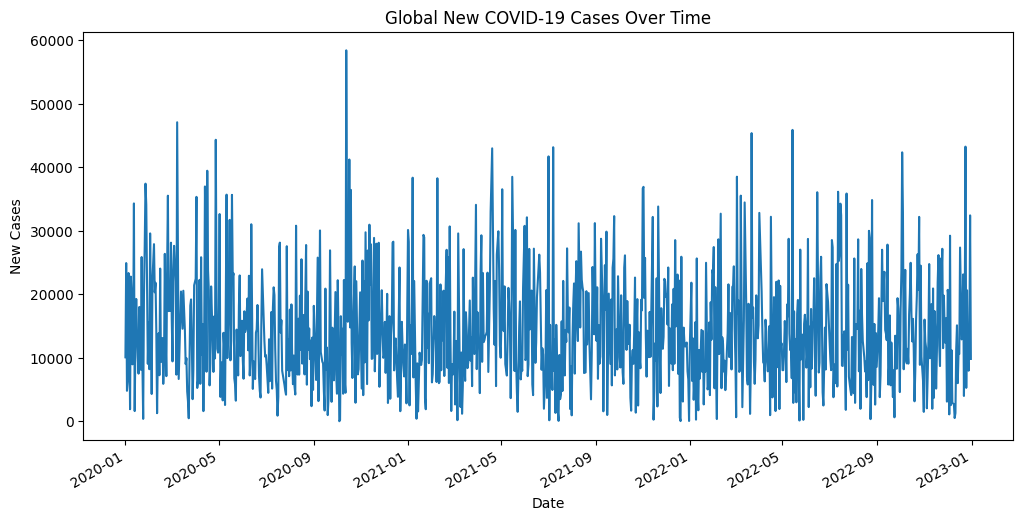

In [45]:
plt.figure(figsize=(12,6))
df.groupby("date")["new_cases"].sum().plot()
plt.title("Global New COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.show()

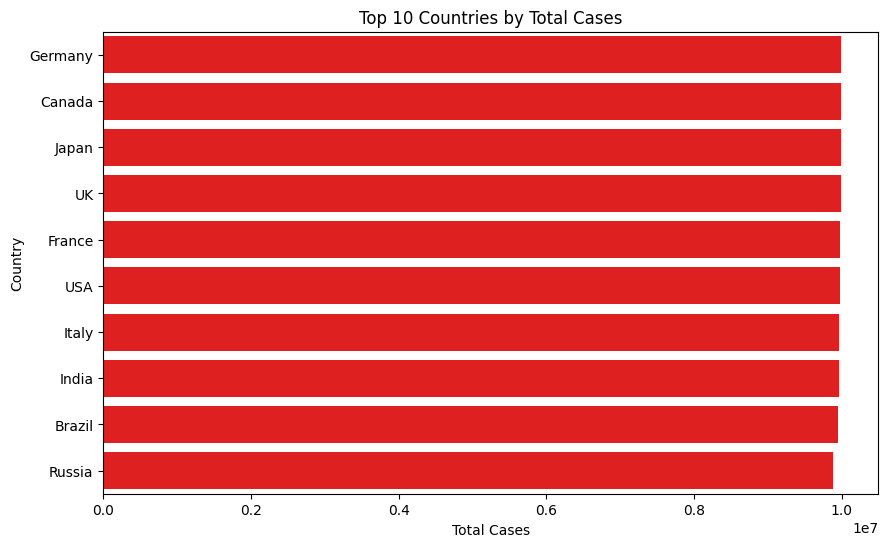

In [60]:
top_countries = df.groupby("location")["total_cases"].max().nlargest(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values,y=top_countries.index,color="red")
plt.title("Top 10 Countries by Total Cases")
plt.xlabel("Total Cases")
plt.ylabel("Country")
plt.show()

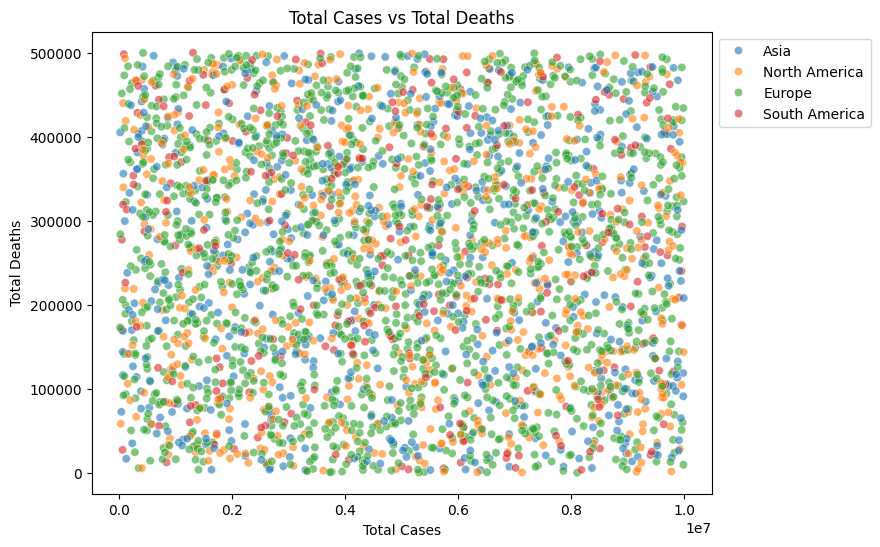

In [49]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="total_cases", y="total_deaths", hue="continent", alpha=0.6)
plt.title("Total Cases vs Total Deaths")
plt.xlabel("Total Cases")
plt.ylabel("Total Deaths")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

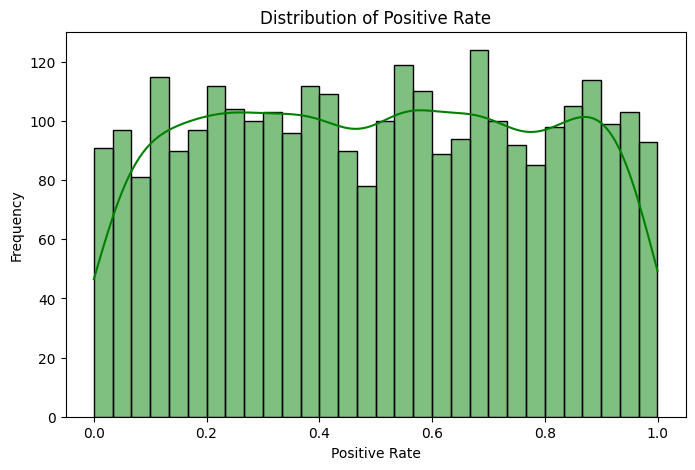

In [63]:
plt.figure(figsize=(8,5))
sns.histplot(df["positive_rate"], bins=30, kde=True, color="green")
plt.title("Distribution of Positive Rate")
plt.xlabel("Positive Rate")
plt.ylabel("Frequency")
plt.show()

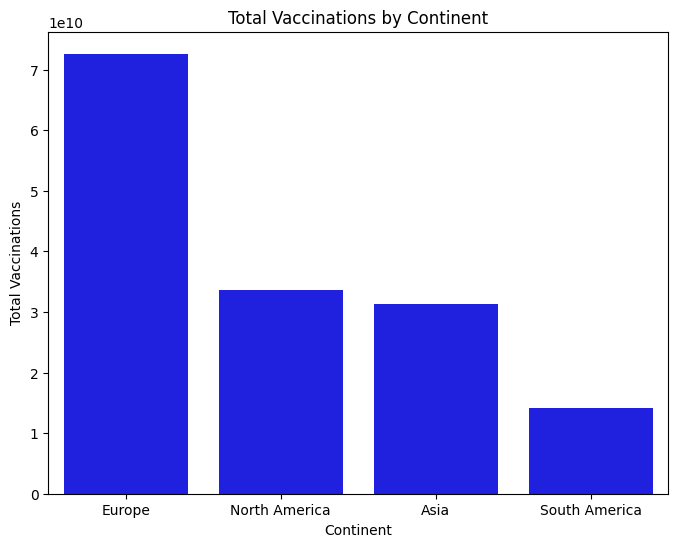

In [68]:
continent_vax = df.groupby("continent")["total_vaccinations"].sum().sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=continent_vax.index, y=continent_vax.values,color="blue")
plt.title("Total Vaccinations by Continent")
plt.xlabel("Continent")
plt.ylabel("Total Vaccinations")
plt.show()